# Exploratory Data Analysis
- This section performs exploratory data analysis of the dataset 
- I analyze demographics such as gender, age, and education, along with economic variables such as consumption and income
- The unit of observation is the **household head**, the manager of the household

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import os; import sys
sys.path.append('/home/mitch/school/ENIGH/src/')
import sys; sys.path.append('/home/mitch/util/python')

In [16]:
processed = '/home/mitch/Dropbox/data/mexico_enigh/processed2/'

figs    = '/home/mitch/github/ENIGH/fig/'
dicts   = '/home/mitch/github/ENIGH/dicts/'

In [17]:
df = pd.read_csv(processed + 'data.csv')
df

consumption_current  location_size         hhid  consumption_food  \
0                34.000119              1  19940110010          5.867128   
1                44.265249              1  19940110030         17.903154   
2                55.064614              1  19940110040         12.873225   
3                55.399681              1  19940110060         20.684452   
4               122.300197              1  19940110070         35.560885   
...                    ...            ...          ...               ...   
20394            31.639798              1  19963399020         14.840565   
20395            25.491084              1  19963399030          8.360638   
20396            11.946668              1  19963399040          3.824656   
20397            89.016606              2  19963399060         18.984631   
20398            33.806916              1  19963399500          9.492550   

       income_current  hh_size  consumption_total  consumption_personal  \
0           42.056359        9          43.547649              2.776740   
1           57.175044        3          44.265249              3.248377   
2           69.337660        6          62.225261              5.401430   
3           90.692570        5          67.675077              1.282063   
4          137.970678        6         149.621478             11.995534   
...               ...      ...                ...                   ...   
20394       35.994922        4          31.639798              1.921662   
20395       29.655967        4          25.554874              0.830044   
20396       14.379203        7          13.054307              1.477268   
20397       83.558445        3          89.016606             16.855481   
20398       29.458018        6          33.806916              1.340223   

       consumption_clothing  income_business  ...  relationship_to_hhm  \
0                  4.182728         0.000000  ...                    1   
1                  3.667275         0.000000  ...                    1   
2                  5.225568         0.000000  ...                    1   
3                  0.102295        15.344245  ...                    1   
4                 11.346217        38.360613  ...                    1   
...                     ...              ...  ...                  ...   
20394              0.498830         0.000000  ...                    1   
20395              0.285046        20.793398  ...                    1   
20396              0.408860         0.000000  ...                    1   
20397              2.299444         0.000000  ...                    1   
20398              0.403838         0.000000  ...                    1   

       education  education_technical  is_household_head     Y      income  \
0            Low                    0               True  1994   36.826188   
1            Low                    0               True  1994   47.055685   
2            Low                    0               True  1994   56.262232   
3            Low                    0               True  1994   77.334995   
4           High                    0               True  1994  110.819548   
...          ...                  ...                ...   ...         ...   
20394        Low                    0               True  1996   33.833325   
20395     Medium                    0               True  1996   20.793398   
20396        Low                    0               True  1996   10.673609   
20397        Low                    0               True  1996   49.622210   
20398       High                    0               True  1996   14.097219   

       consumption        cpi  log_income  log_consumption  
0        12.826595  19.551304    3.606209         2.551521  
1        24.818805  19.551304    3.851332         3.211602  
2        23.500223  19.551304    4.030023         3.157010  
3        22.068809  19.551304    4.348147         3.094165  
4        58.902636  19.551304    4.707903         4.075886  
.

# Gender
Over 80% of household heads are male.

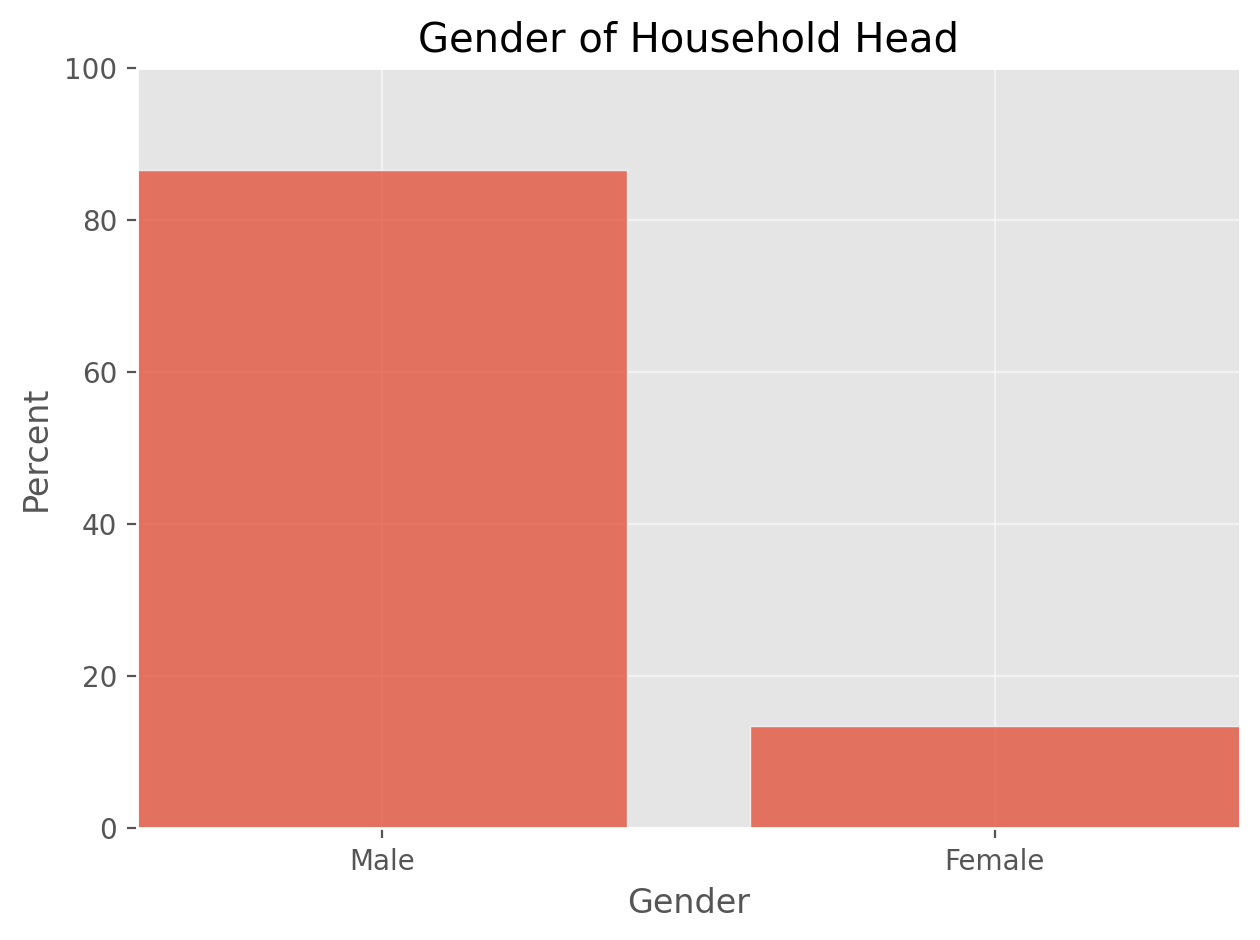

In [18]:
plt.clf()
ax = sns.histplot(df, x='sex', 
             stat='percent', 
             weights='weight',
             shrink=0.8)
ax.set_xlabel('Gender')
ax.set_ylim(0, 100)
plt.title('Gender of Household Head');

# Education

In [19]:
# reimpose order in education categories, lost in csv format
df['education'] = pd.Categorical(df.education).reorder_categories(['Low', 'Medium', 'High'])

In [20]:
education = 100 * df.groupby('education')['weight'].sum() / df['weight'].sum()
education

/tmp/ipykernel_42540/1662196951.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education = df.groupby('education')['weight'].sum() / df['weight'].sum()


education
Low       0.596579
Medium    0.271608
High      0.131813
Name: weight, dtype: float64

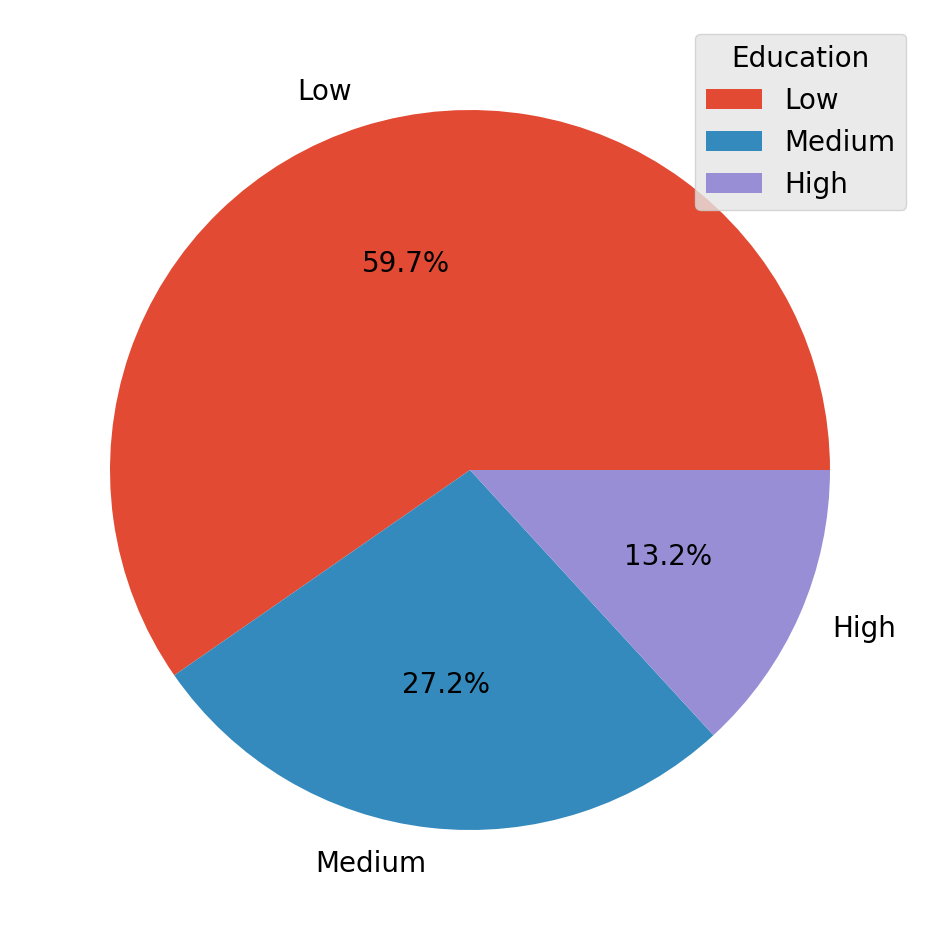

In [21]:
plt.clf()
plt.pie(education, labels=education.index, autopct='%.1f%%')
plt.legend(title='Education');

## Education and Gender
1. Highly educated households are slightly more likely to have a Male head of household
2. Female heads of households are more likely to have a low education level

In [22]:
education_by_gender = 100 * pd.crosstab(df.education, df.sex, df.weight, aggfunc='sum', normalize='index')
education_by_gender.reset_index(inplace=True)
education_by_gender = education_by_gender.melt(id_vars='education', value_name='Percent')

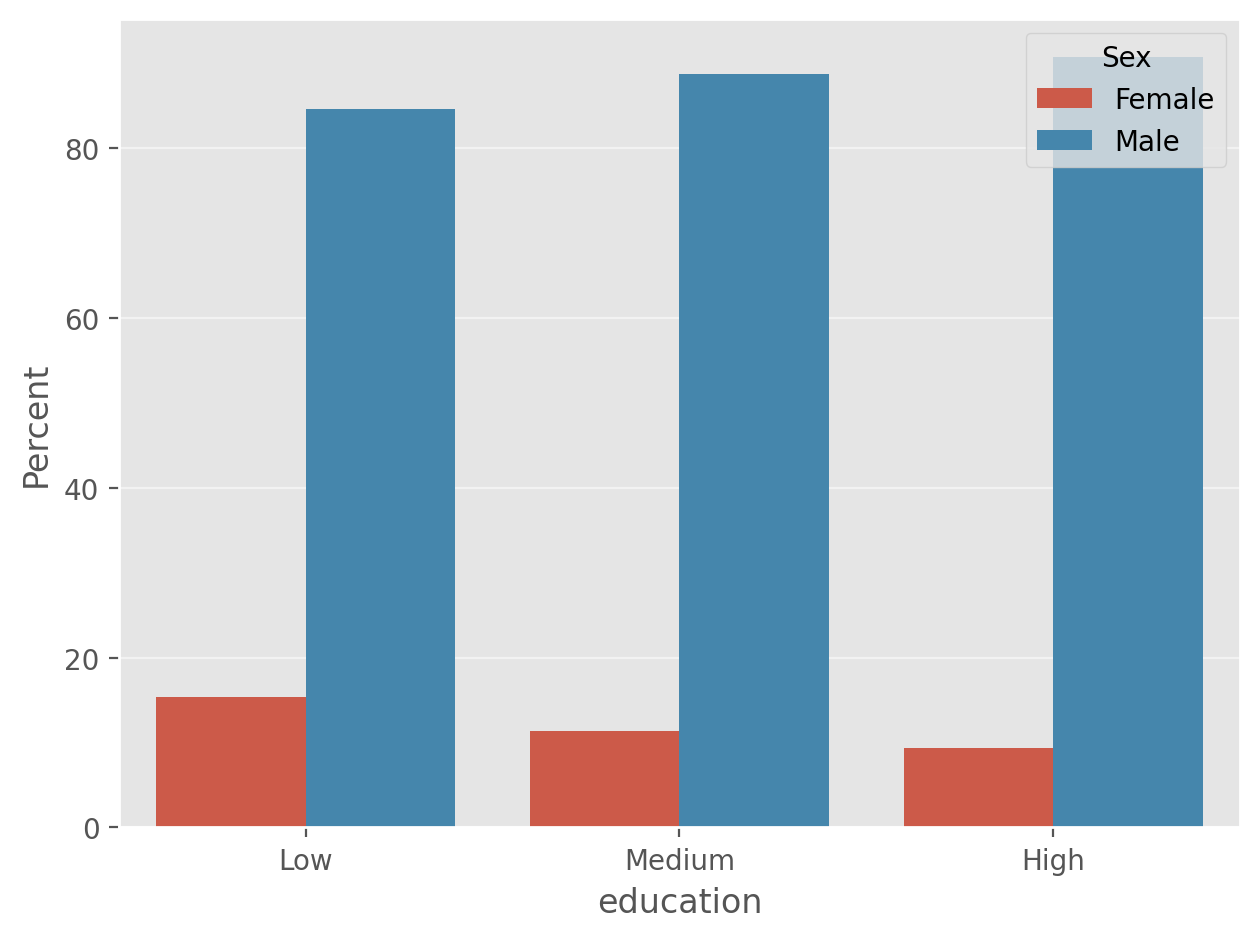

In [23]:
sns.barplot(education_by_gender, x='education', y='Percent', hue='sex')
plt.legend(title='Sex');
plt.xlabel('Education')
plt.title('Education of Household Head by Sex')

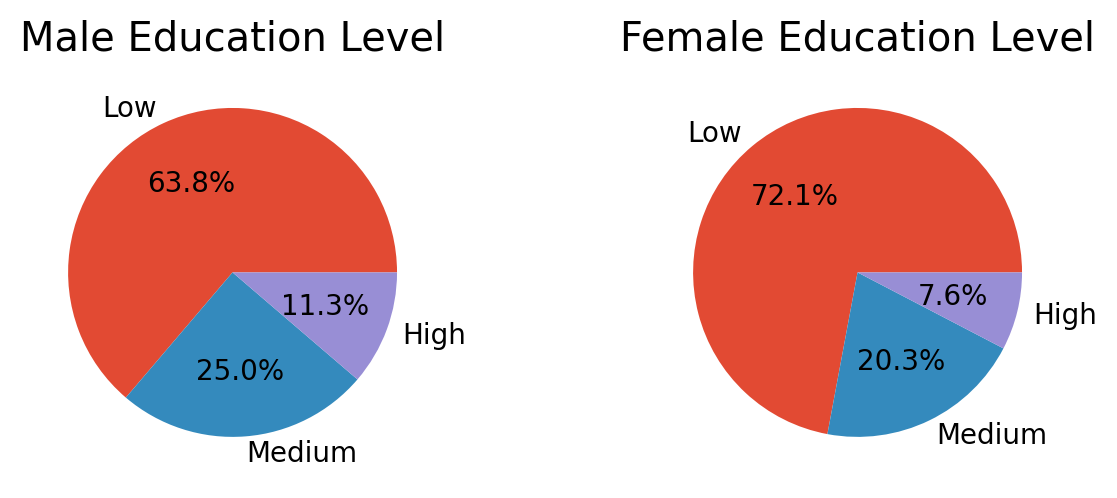

In [24]:
plt.subplot(221)
male = df.query("sex == 'Male'").education.value_counts()
plt.pie(male, labels=[x.title() for x in male.index], autopct='%.1f%%')
plt.title('Male Education Level')

plt.subplot(222)
female = df.query("sex == 'Female'").education.value_counts()
plt.pie(female, labels=[x.title() for x in female.index], autopct='%.1f%%')
plt.title('Female Education Level');

## Education and Location Size
- This section studies the relationship between education and the size of the locality a household lives in
- I consider four locality sizes: metropolitan areas, population greater than 100,000, population between 15,000 and 99,999, and population between 2,500 and 14,999
- As population increases, the households are more likely to have a medium or high level of education

In [25]:
education_by_location = 100 * pd.crosstab(df.location_size, df.education, df.weight, aggfunc='sum', normalize='index')
education_by_location.reset_index(inplace=True)
education_by_location = education_by_location.melt(id_vars='location_size', value_name='Percent')

In [26]:
location_size_labels = [
    'Metropolitan Area', 
    '>= 100,000', 
    '15,000 - 99,999', 
    '2,500 - 14,999'
]

/tmp/ipykernel_42540/2567970149.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(location_size_labels)


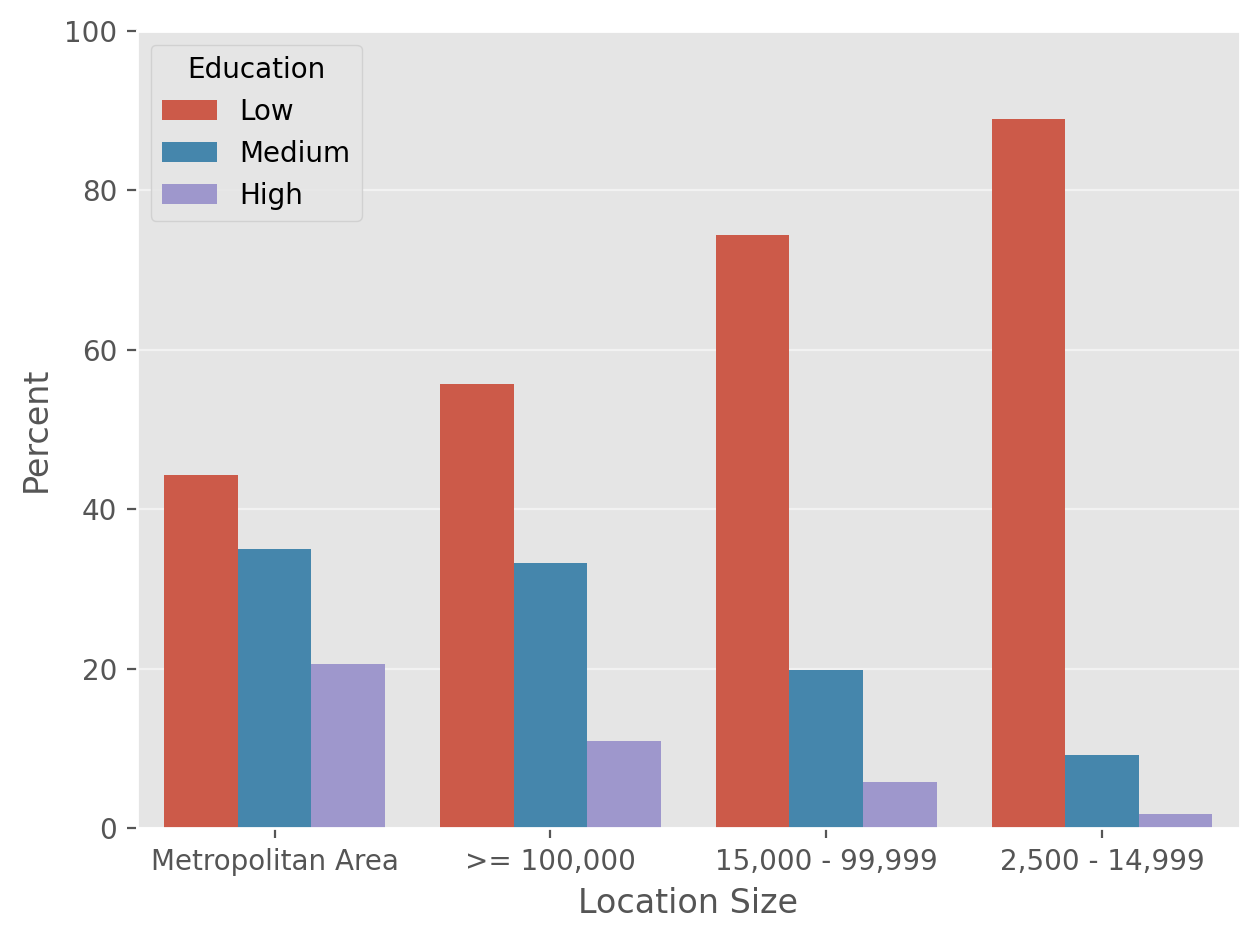

In [27]:
ax = sns.barplot(education_by_location, x='location_size', y='Percent', hue='education')
ax.legend(title='Education')

ax.set_xlabel('Location Size')
ax.set_xticklabels(location_size_labels)
ax.set_ylim(0, 100);
ax.set_title('Education by Location Size')

# Income

## Distributions of Income and Consumption
- This figure plots the distribution of income and consumption
- As is typical, these distributions feature a large right tail

/tmp/ipykernel_42540/2381522298.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.income, bins=20, hist_kws={'weights':df.weight})
/tmp/ipykernel_42540/2381522298.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.consumption, bins=20, hist_kws={'weights':df.weight})


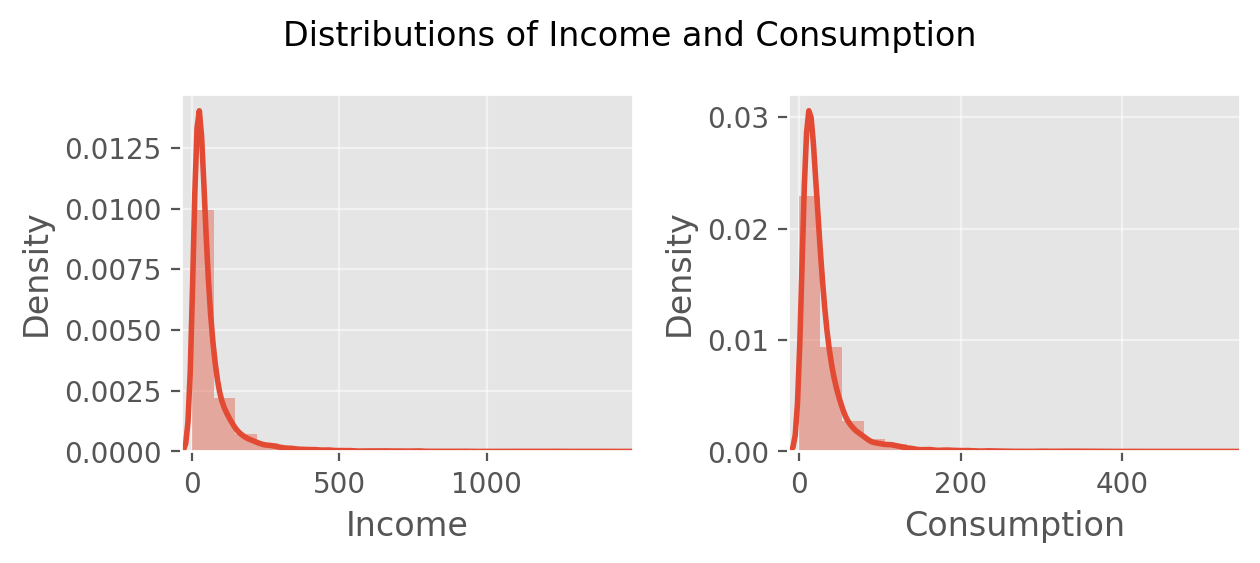

In [28]:
plt.subplot(221)
sns.distplot(df.income, bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Income')

plt.subplot(222)
sns.distplot(df.consumption, bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Consumption')

plt.suptitle('Distributions of Income and Consumption');

## Log Distributions of Income and Consumption
- Here we can see that log consumption and income are well approximated by a normal distribution

/tmp/ipykernel_42540/1896007037.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.income.map(np.log), bins=20, hist_kws={'weights':df.weight})
/tmp/ipykernel_42540/1896007037.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.consumption.map(np.log), bins=20, hist_kws={'weights':df.weig

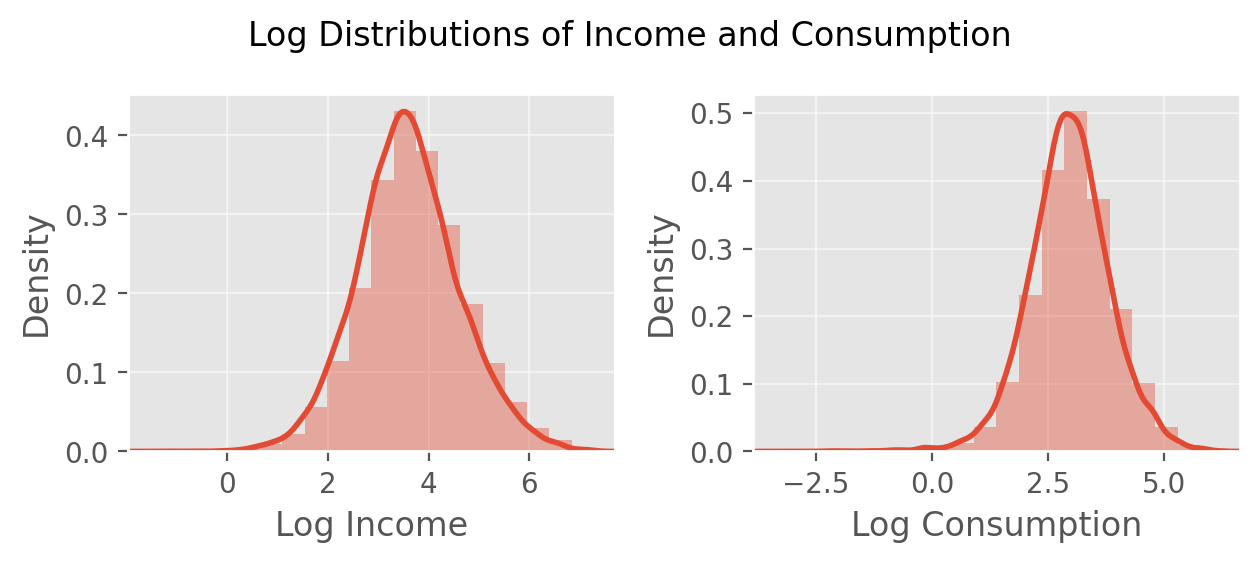

In [29]:
plt.subplot(221)
sns.distplot(df.income.map(np.log), bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Log Income')

plt.subplot(222)
sns.distplot(df.consumption.map(np.log), bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Log Consumption')

plt.suptitle('Log Distributions of Income and Consumption');

# Decomposed income
- This figure plots scatterplots for the three primary parts of our measure of income: salaried income, business income, and transfers

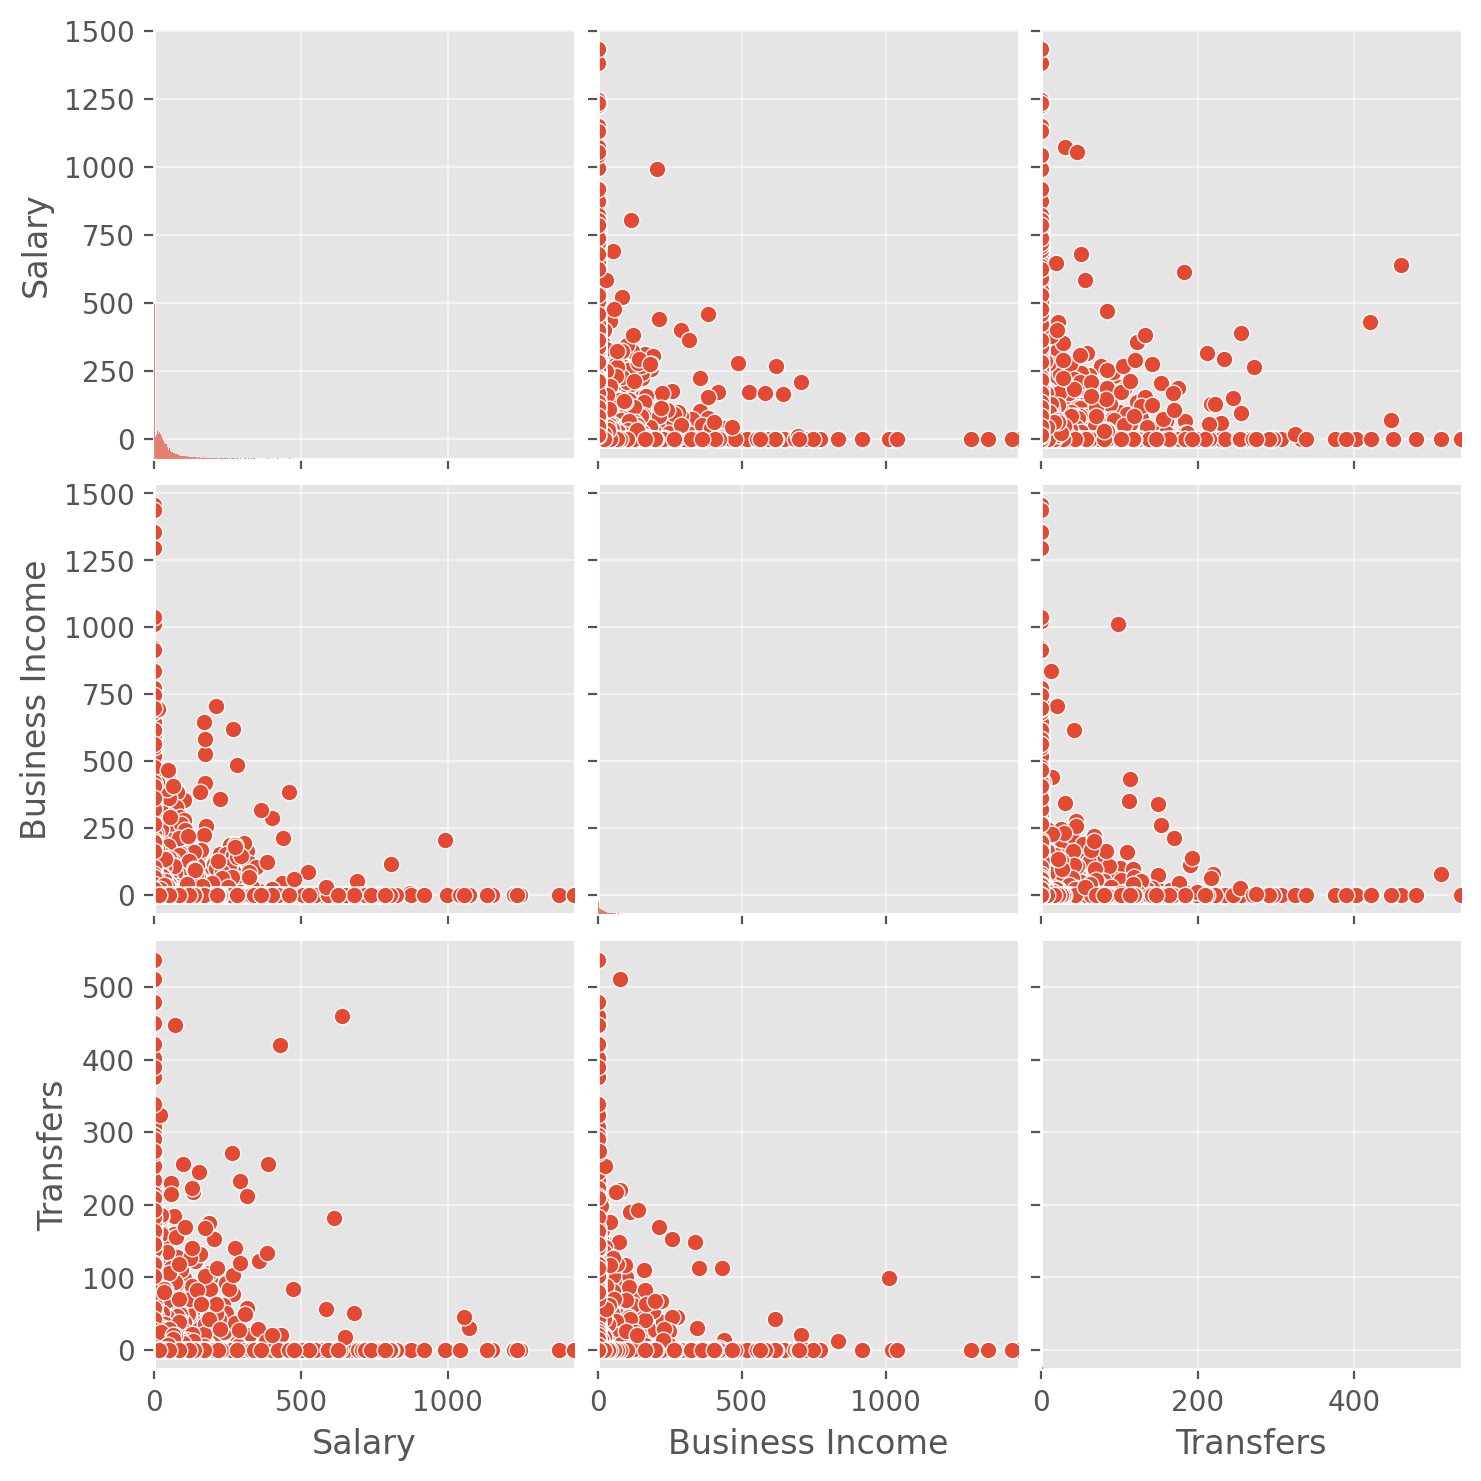

In [30]:
income_columns = ['income_salary', 'income_business', 'income_transfers']
income_labels = {
    'income_salary':'Salary',
    'income_business':'Business Income',
    'income_transfers':'Transfers'}
g = sns.pairplot(df[income_columns])

for ii in np.arange(len(income_columns)):
    ax = g.axes[ii, 0]
    ax.set_ylabel(income_labels[ax.get_ylabel()])

for jj in np.arange(len(income_columns)):
    ax = g.axes[-1, jj]
    ax.set_xlabel(income_labels[ax.get_xlabel()])

/home/mitch/envs/main/lib/python3.10/site-packages/pandas/core/algorithms.py:1814: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)


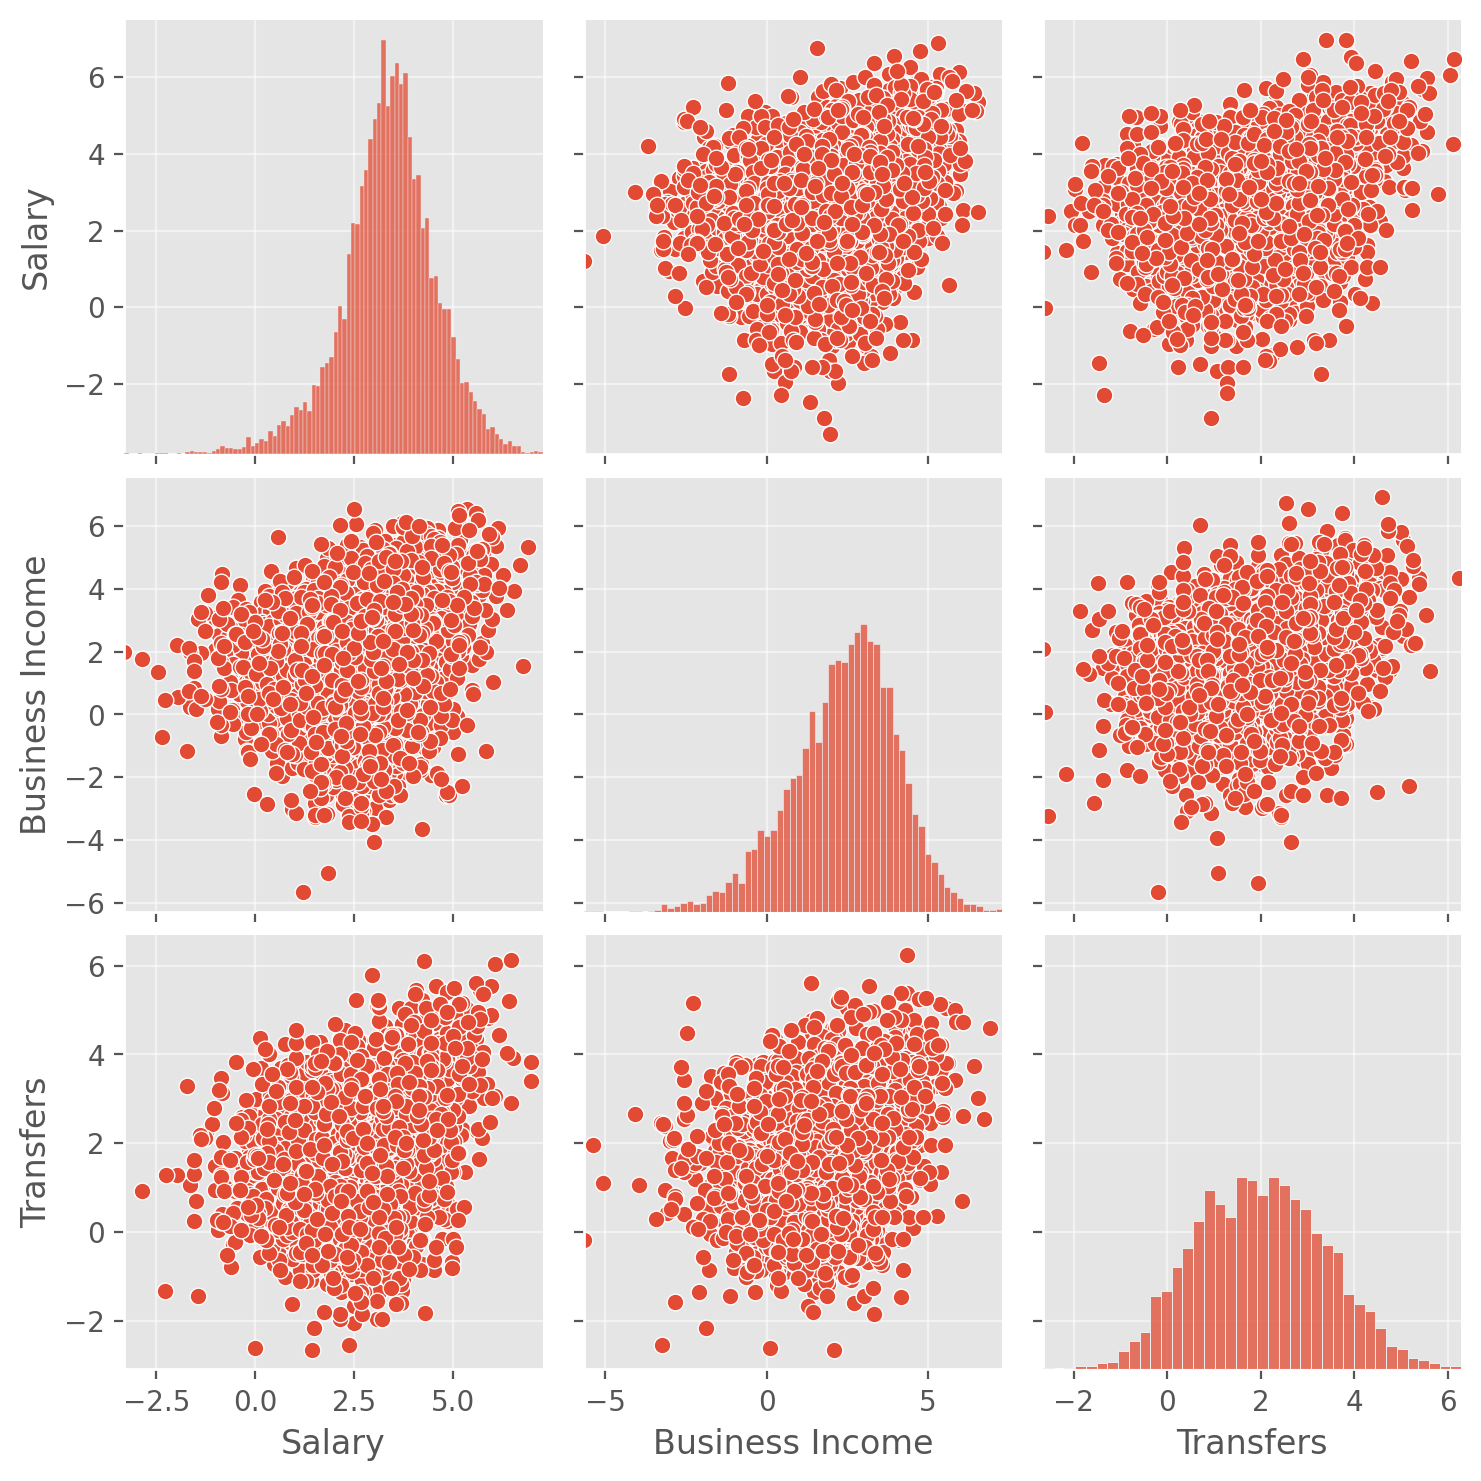

In [31]:
g = sns.pairplot(df[income_columns].map(np.log))

for ii in np.arange(len(income_columns)):
    ax = g.axes[ii, 0]
    ax.set_ylabel(income_labels[ax.get_ylabel()])

for jj in np.arange(len(income_columns)):
    ax = g.axes[-1, jj]
    ax.set_xlabel(income_labels[ax.get_xlabel()])

## Decomposed Consumption
1. This figure plots scatter plots for total consumption and its components

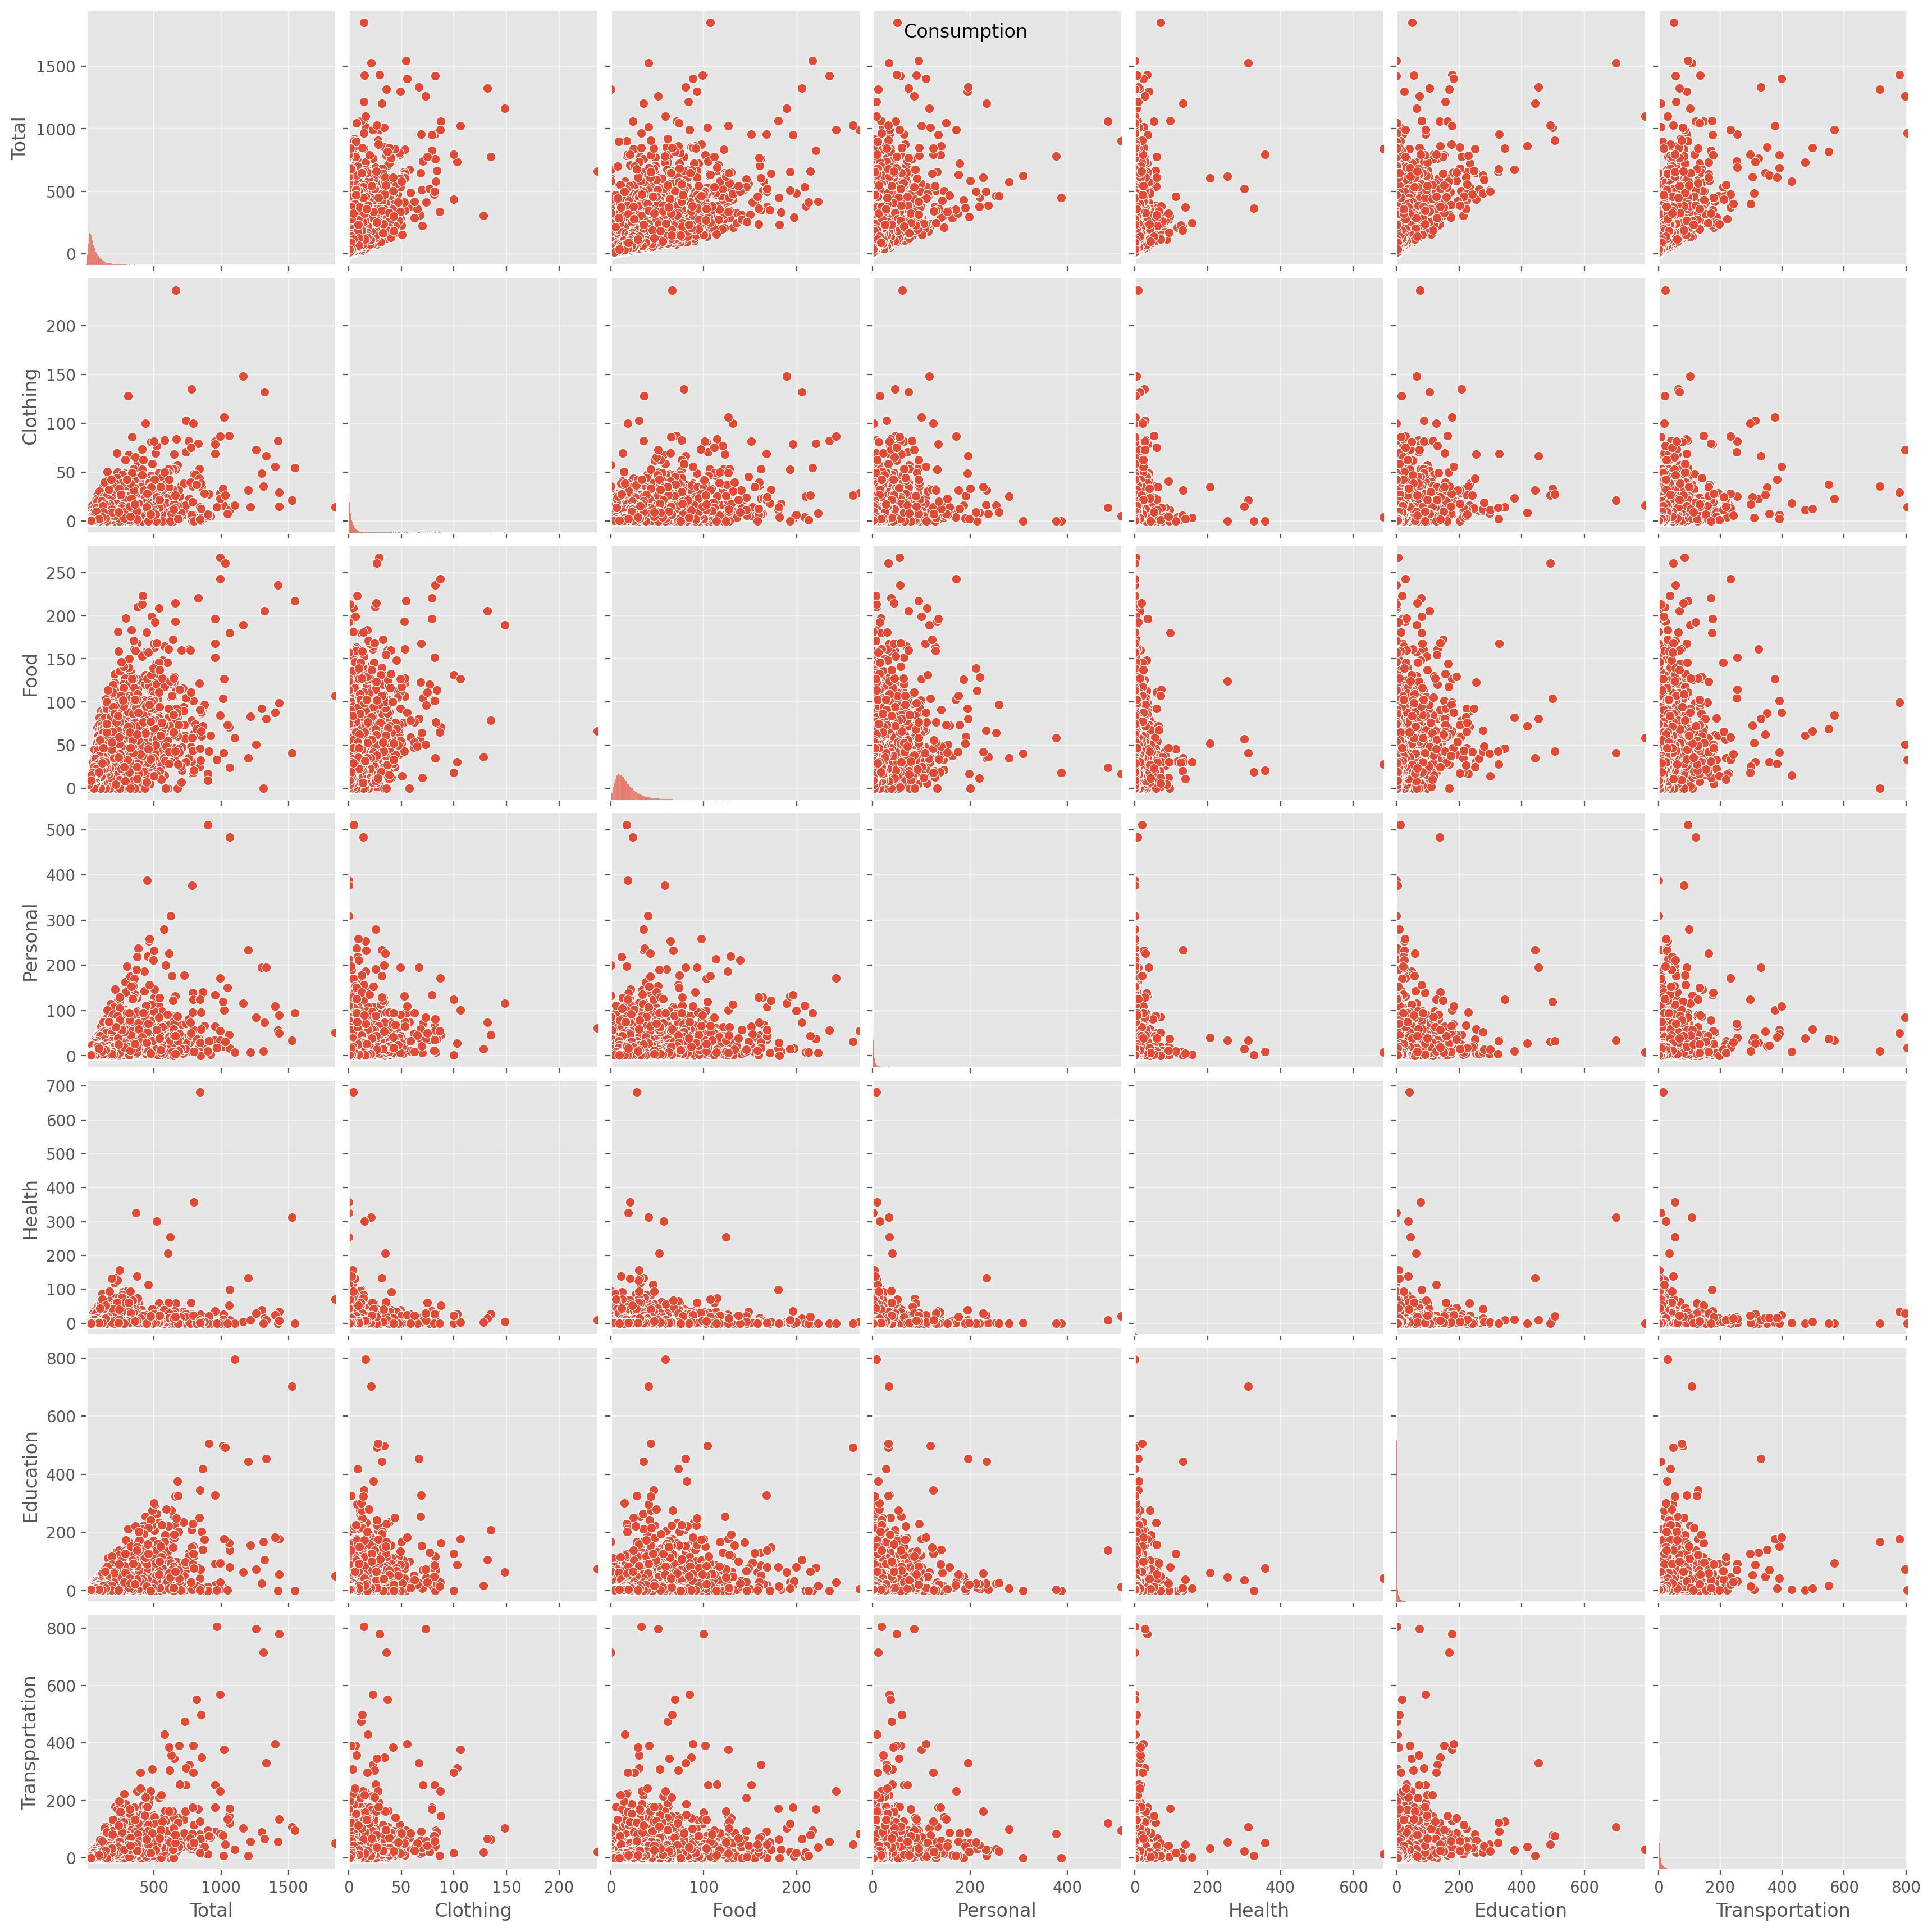

In [32]:
consumption_columns = ['consumption_current', 'consumption_clothing', 'consumption_food', 'consumption_personal', 'consumption_health', 'consumption_education', 'consumption_transportation']
consumption_labels = {
    'consumption_current':'Total',
                       'consumption_clothing':'Clothing',
                       'consumption_food':'Food',
                       'consumption_personal':'Personal',
                       'consumption_health':'Health',
                       'consumption_education':'Education',
                       'consumption_transportation':'Transportation'
                       }
g = sns.pairplot(df[consumption_columns])
plt.suptitle('Consumption')

for ii in np.arange(len(consumption_columns)):
    ax = g.axes[ii, 0]
    ax.set_ylabel(consumption_labels[ax.get_ylabel()])

for jj in np.arange(len(consumption_columns)):
    ax = g.axes[-1, jj]
    ax.set_xlabel(consumption_labels[ax.get_xlabel()])

### Decomposed Consumption: Log Levels
- This figure plots scatter plots for the log levels of different consumption components
- We observe an increasing relationship between each component of consumption

/home/mitch/envs/main/lib/python3.10/site-packages/pandas/core/algorithms.py:1814: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)


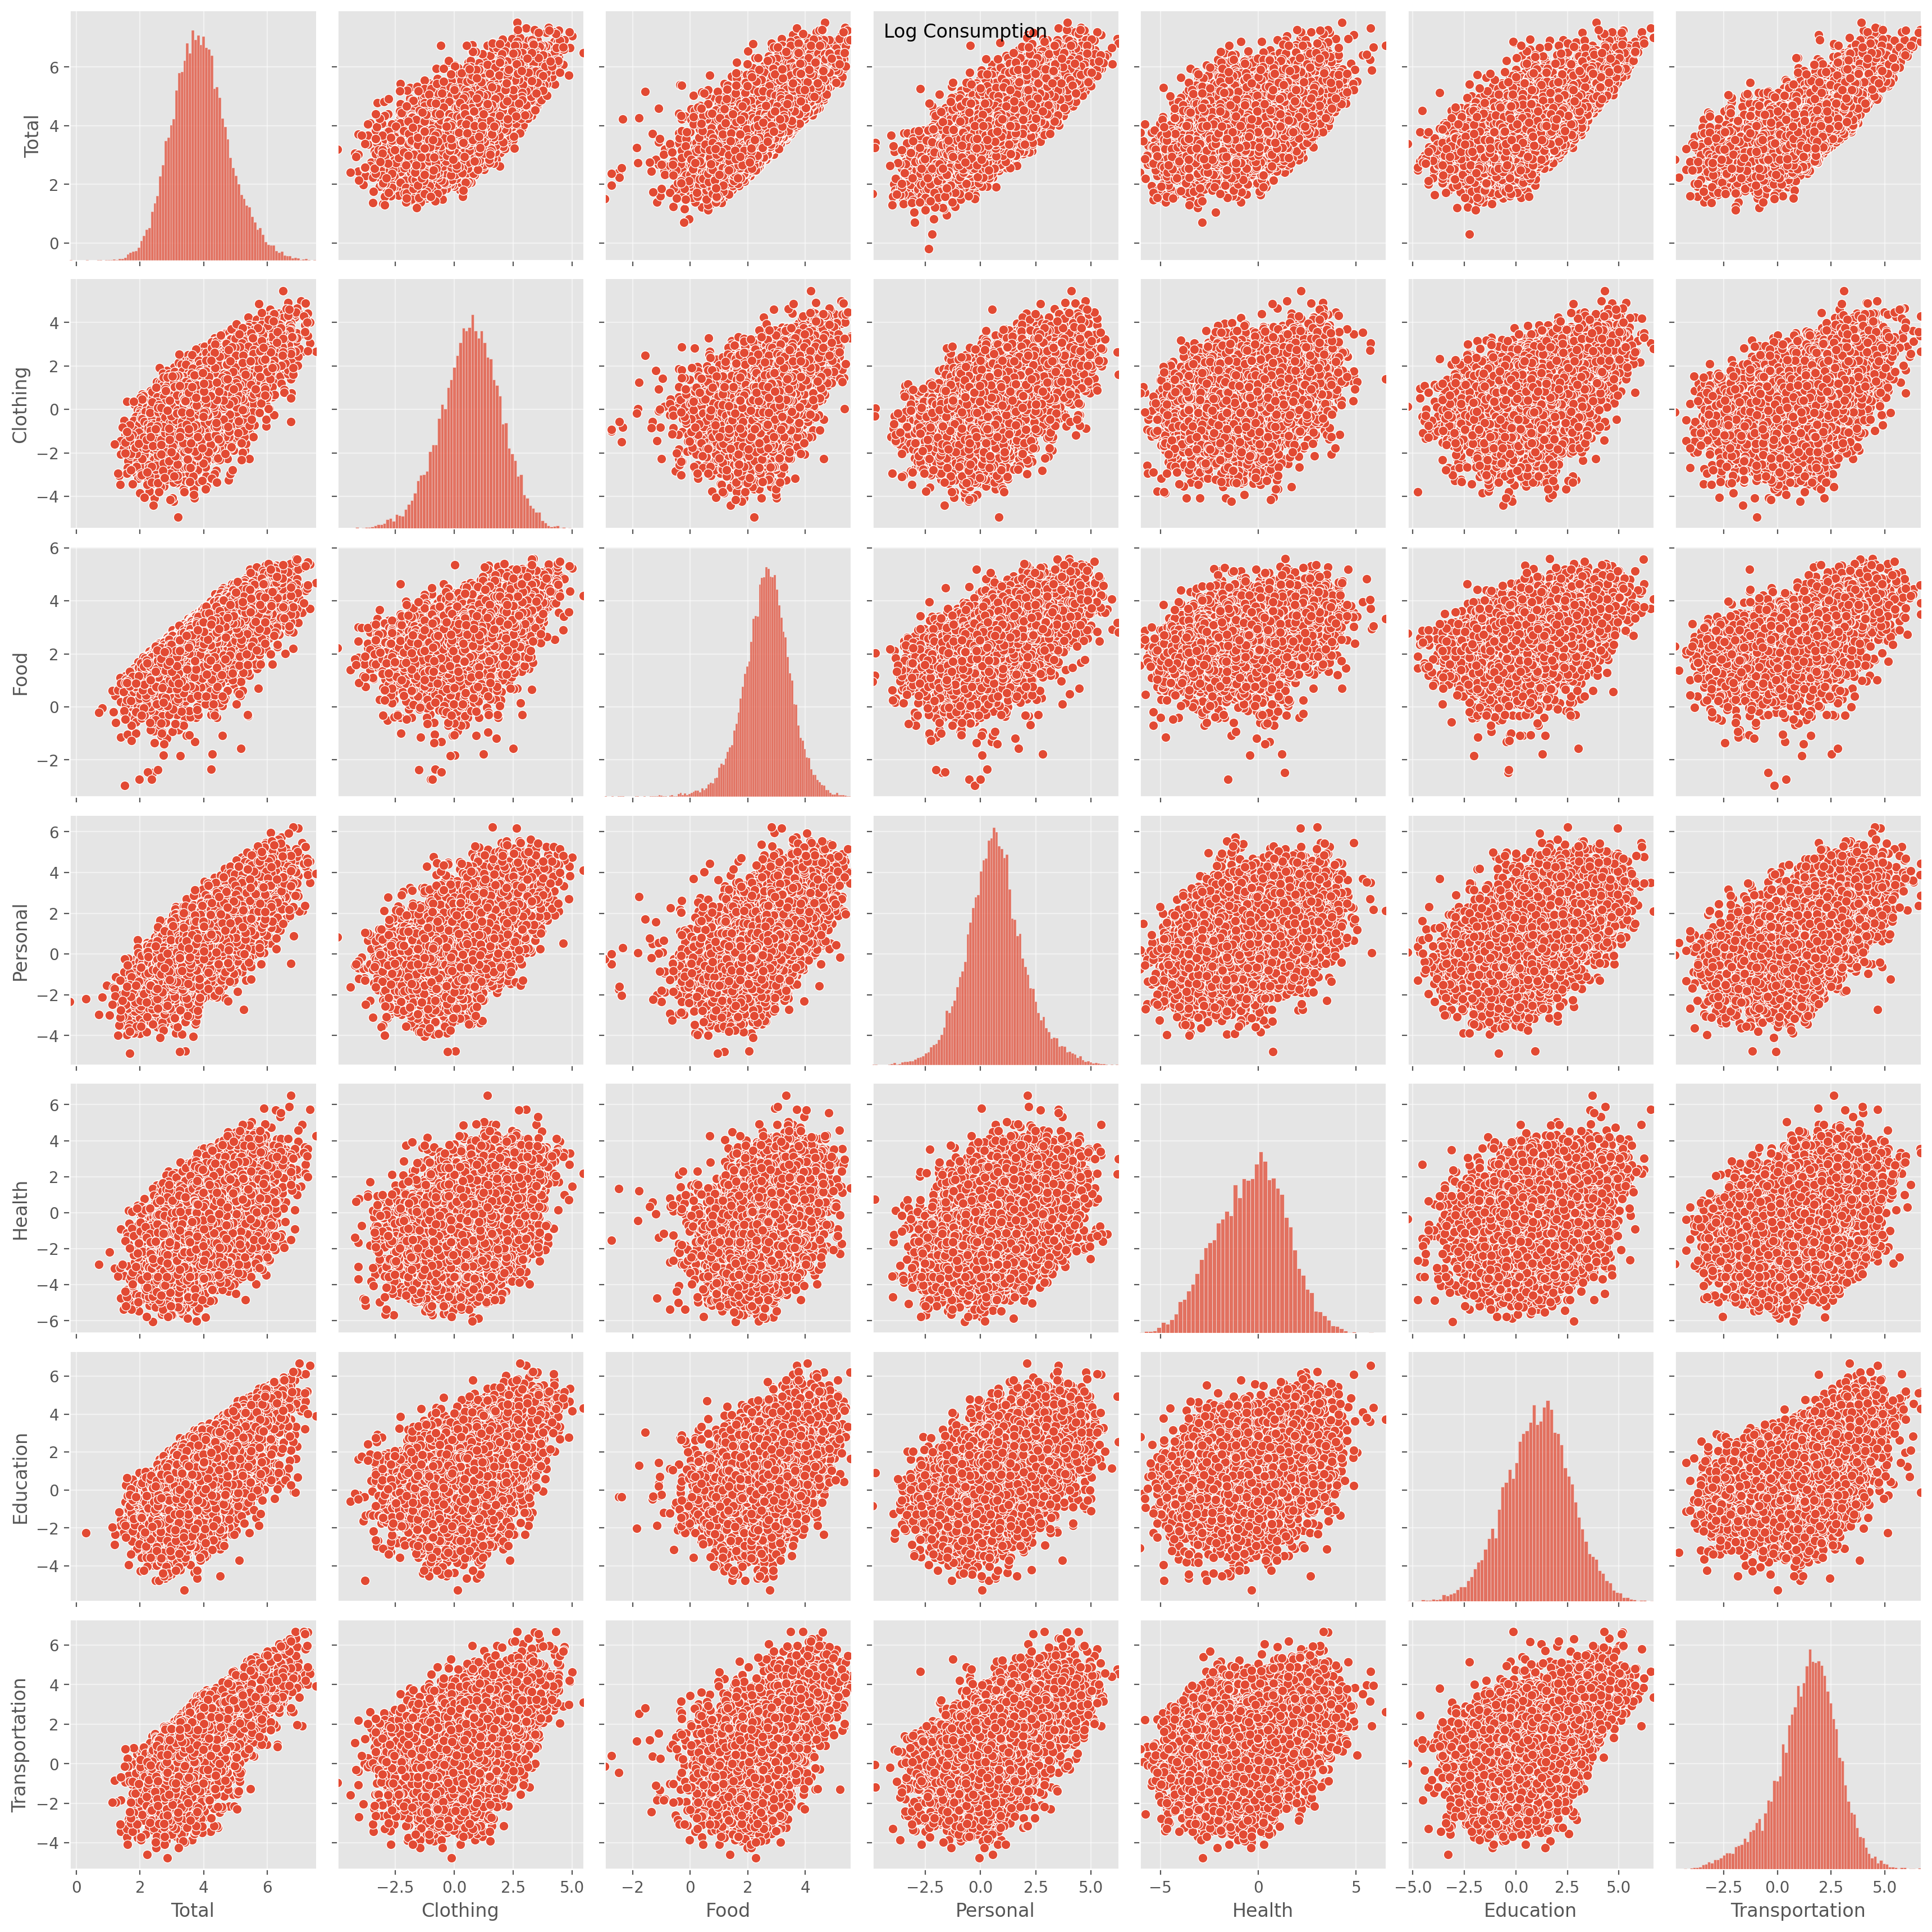

In [33]:
g = sns.pairplot(df[consumption_columns].map(np.log))
plt.suptitle('Log Consumption')

for ii in np.arange(len(consumption_columns)):
    ax = g.axes[ii, 0]
    ax.set_ylabel(consumption_labels[ax.get_ylabel()])

for jj in np.arange(len(consumption_columns)):
    ax = g.axes[-1, jj]
    ax.set_xlabel(consumption_labels[ax.get_xlabel()])

# Age
- This section characterizes the age distribution of household heads
- The majority of household heads are in their thirties, with less household heads in their fifties

In [49]:
agebins = np.arange(df.age.min(), df.age.max()+5, 5)

# this forces the final bin to be inclusive of the maximum age
agebins[-1] = df.age.max()+1

df['age_bin'] = pd.cut(df['age'], agebins, right=False)
binsize = 100*df.groupby('age_bin')['weight'].sum() / df['weight'].sum()
bin_labels = [str(x.left) + '-' + str(x.right-1) for x in binsize.index]
binsize

/tmp/ipykernel_42540/2177885908.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binsize = 100*df.groupby('age_bin')['weight'].sum() / df['weight'].sum()


age_bin
[25, 30)    13.823071
[30, 35)    17.542498
[35, 40)    17.609791
[40, 45)    15.085659
[45, 50)    13.085999
[50, 55)    11.392006
[55, 61)    11.460976
Name: weight, dtype: float64

/tmp/ipykernel_42540/1142002347.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(bin_labels);


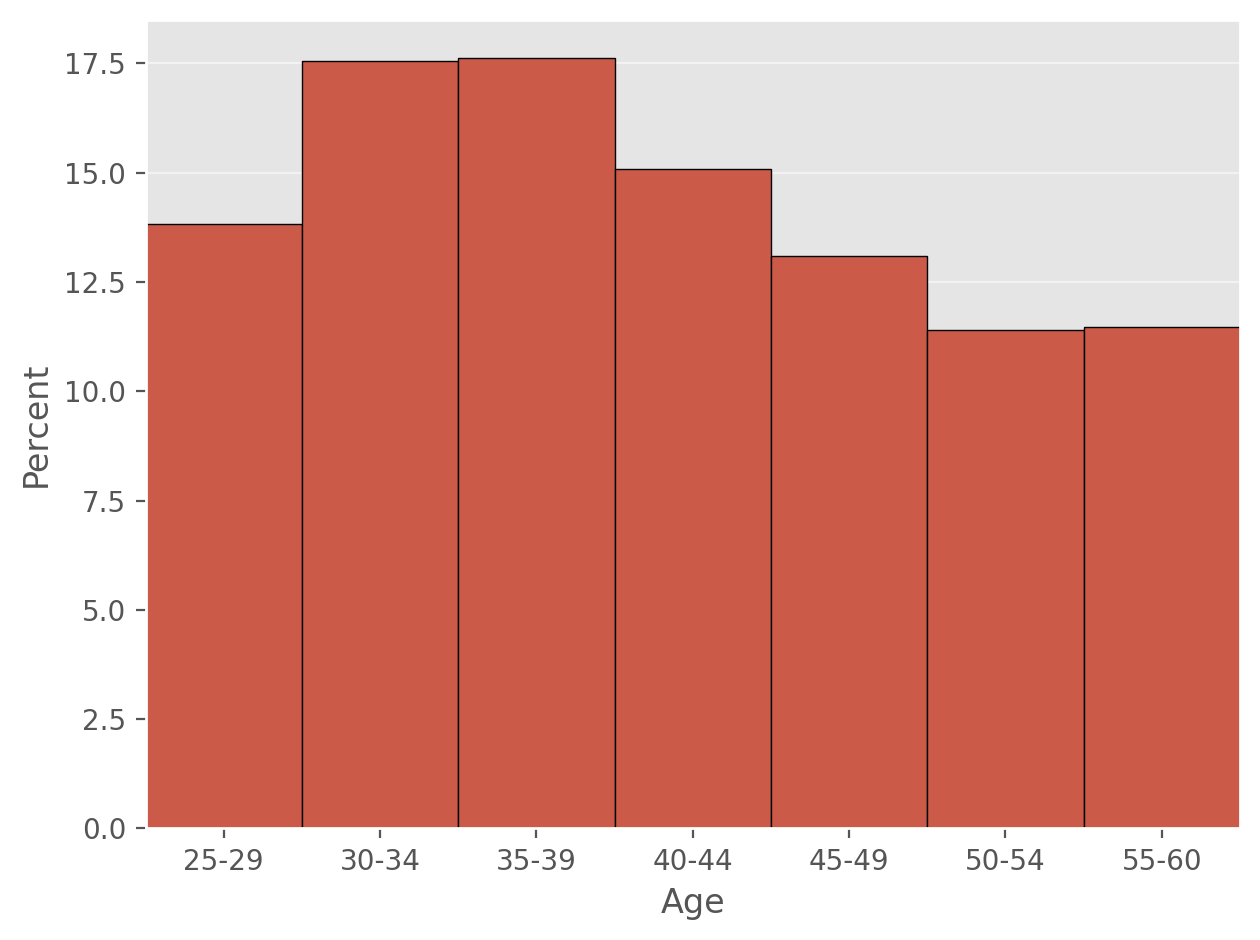

In [50]:
ax = sns.barplot(x=binsize.index, y=binsize.values, 
            edgecolor='black', width=1.0
            )
ax.set_xticklabels(bin_labels);

ax.set_xlabel('Age')
ax.set_ylabel('Percent');

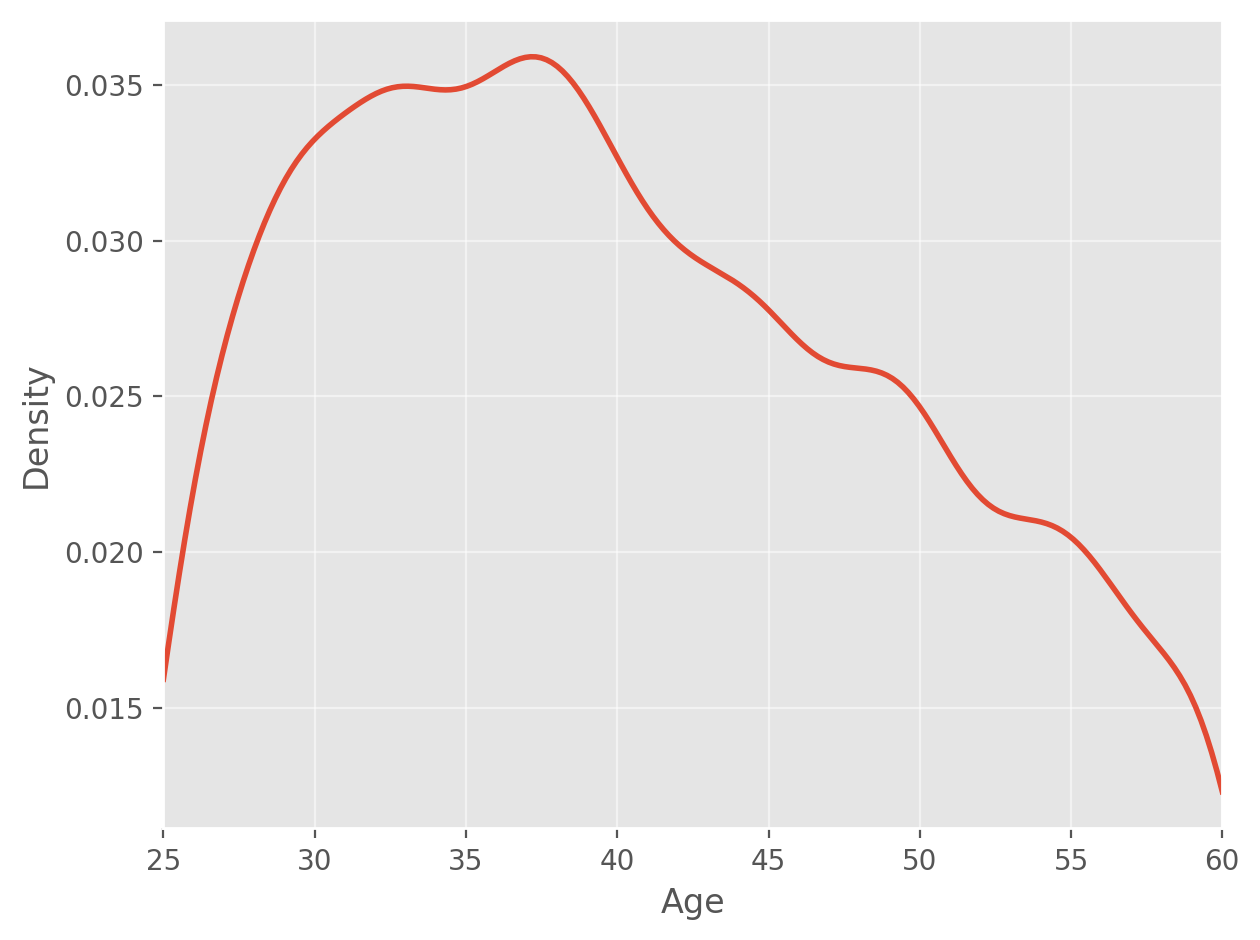

In [51]:
plt.clf()
ax = sns.kdeplot(df, x = 'age', weights='weight',
                 clip = (df.age.min(), df.age.max()),
            linestyle='-')
ax.set_xlim(df.age.min(), df.age.max())
ax.set_xlabel('Age');